In [205]:
#Importing libraries
import pandas as pd
import nltk
import string
import re
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix


In [206]:
#Downloading libraries
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [207]:
from google.colab import files
uploaded = files.upload()

Saving sentimentdataset.csv to sentimentdataset (4).csv


In [208]:
df1 = pd.read_csv("sentimentdataset.csv")

## Exploring The Dataset

In [209]:
#Checking the dimensionality of the dataset
df1.shape

(732, 14)

In [210]:
#Displaying the first 5 rows of the dataset
df1.head()

,Unnamed: 0.1,Unnamed: 0,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,1/15/2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,1/15/2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,1/15/2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,1/15/2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,1/15/2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [211]:
#Displaying the last 5 rows of the dataset
df1.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,8/18/2017 18:20,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,6/22/2018 14:15,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,4/5/2019 17:30,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",2/29/2020 20:45,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,11/15/2020 15:15,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24,47,USA,2020,11,15,15


In [212]:
#Displaying the datatypes of each column in the dataset
df1.dtypes

Unnamed: 0.1     int64
Unnamed: 0       int64
Text            object
Timestamp       object
User            object
Platform        object
Hashtags        object
Retweets         int64
Likes            int64
Country         object
Year             int64
Month            int64
Day              int64
Hour             int64
dtype: object

In [213]:
# Displaying a concise summary of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  732 non-null    int64 
 1   Unnamed: 0    732 non-null    int64 
 2   Text          732 non-null    object
 3   Timestamp     732 non-null    object
 4   User          732 non-null    object
 5   Platform      732 non-null    object
 6   Hashtags      732 non-null    object
 7   Retweets      732 non-null    int64 
 8   Likes         732 non-null    int64 
 9   Country       732 non-null    object
 10  Year          732 non-null    int64 
 11  Month         732 non-null    int64 
 12  Day           732 non-null    int64 
 13  Hour          732 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 80.2+ KB


###Data Cleaning

In [214]:
#Checking whether there are any duplicates in the dataset
df1.duplicated().sum()

0

In [215]:
#Checking the number of null values in each column
df1.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [216]:
#Column names of the dataset
df1.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Timestamp', 'User', 'Platform',
       'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')

In [217]:
#Dropping unwanted columns from the dataset
df1 = df1.drop(columns=['Unnamed: 0.1', 'Unnamed: 0','Timestamp','User','Hashtags','Hour'])

In [218]:
#Checking whethere the unwanted columns are dropped
df1.columns

Index(['Text', 'Platform', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day'],
      dtype='object')

##Text Preprocessing

Tokenization

In [219]:
# Function to tokenize text
def tokenize_text(text):
    # Tokenizing the text
    tokens = word_tokenize(text)
    return tokens

# Applying tokenization to each row in the 'Text' column
df1['text_tokens'] = df1['Text'].apply(tokenize_text)

# Printing the original text and tokenized text in one line
df1[['Text', 'text_tokens']].head()

,Text,text_tokens
0,Enjoying a beautiful day at the park! ...,"[Enjoying, a, beautiful, day, at, the, park, !]"
1,Traffic was terrible this morning. ...,"[Traffic, was, terrible, this, morning, .]"
2,Just finished an amazing workout! 💪 ...,"[Just, finished, an, amazing, workout, !, 💪]"
3,Excited about the upcoming weekend getaway! ...,"[Excited, about, the, upcoming, weekend, getaw..."
4,Trying out a new recipe for dinner tonight. ...,"[Trying, out, a, new, recipe, for, dinner, ton..."


Lower Casing

In [220]:
# Lowercasing each token within the lists in the 'text_tokens' column
df1['tokens_lowertext'] = df1['text_tokens'].apply(lambda tokens: [token.lower() for token in tokens])
df1[['text_tokens', 'tokens_lowertext']].head()

,text_tokens,tokens_lowertext
0,"[Enjoying, a, beautiful, day, at, the, park, !]","[enjoying, a, beautiful, day, at, the, park, !]"
1,"[Traffic, was, terrible, this, morning, .]","[traffic, was, terrible, this, morning, .]"
2,"[Just, finished, an, amazing, workout, !, 💪]","[just, finished, an, amazing, workout, !, 💪]"
3,"[Excited, about, the, upcoming, weekend, getaw...","[excited, about, the, upcoming, weekend, getaw..."
4,"[Trying, out, a, new, recipe, for, dinner, ton...","[trying, out, a, new, recipe, for, dinner, ton..."


Removal of Punctuations

In [221]:
# Defining punctuation removal function
PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
  """custom function to remove punctuation"""
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Removing punctuations from lowercase tokens
df1["text_no_punct"] = df1["tokens_lowertext"].apply(lambda text: ' '.join(remove_punctuation(word) for word in text))

# Printing the results
df1[['tokens_lowertext', 'text_no_punct']].head()

,tokens_lowertext,text_no_punct
0,"[enjoying, a, beautiful, day, at, the, park, !]",enjoying a beautiful day at the park
1,"[traffic, was, terrible, this, morning, .]",traffic was terrible this morning
2,"[just, finished, an, amazing, workout, !, 💪]",just finished an amazing workout 💪
3,"[excited, about, the, upcoming, weekend, getaw...",excited about the upcoming weekend getaway
4,"[trying, out, a, new, recipe, for, dinner, ton...",trying out a new recipe for dinner tonight


Removal of Whitespace  

In [222]:
# Defining a function to remove whitespaces
def remove_whitespace(text):
    return ' '.join(text.split())

# Applying the function to each text in the DataFrame
df1['text_no_whitespace'] = df1['text_no_punct'].apply(remove_whitespace)

# Printing the DataFrame with text and text without whitespaces
df1[['text_no_punct', 'text_no_whitespace']].head()

,text_no_punct,text_no_whitespace
0,enjoying a beautiful day at the park,enjoying a beautiful day at the park
1,traffic was terrible this morning,traffic was terrible this morning
2,just finished an amazing workout 💪,just finished an amazing workout 💪
3,excited about the upcoming weekend getaway,excited about the upcoming weekend getaway
4,trying out a new recipe for dinner tonight,trying out a new recipe for dinner tonight


In [223]:
#Checking the count of each platform
df1['Platform'].value_counts()

Platform
 Instagram     258
 Facebook      231
 Twitter       128
 Twitter       115
Name: count, dtype: int64

In [224]:
# Removing leading and trailing spaces from string elements in the DataFrame 'df1'.
df1= df1.applymap(lambda x: x.strip() if isinstance(x,str)else x)

In [225]:
#Checking the count of each platform
df1['Platform'].value_counts()

Platform
Instagram    258
Twitter      243
Facebook     231
Name: count, dtype: int64

Removal of Stopwords

In [226]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
df1['text_no_stopwords'] = df1['text_no_whitespace'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Printing the DataFrame with text and text without stopwords
df1[['text_no_whitespace', 'text_no_stopwords']].head()

,text_no_whitespace,text_no_stopwords
0,enjoying a beautiful day at the park,enjoying beautiful day park
1,traffic was terrible this morning,traffic terrible morning
2,just finished an amazing workout 💪,finished amazing workout 💪
3,excited about the upcoming weekend getaway,excited upcoming weekend getaway
4,trying out a new recipe for dinner tonight,trying new recipe dinner tonight


Removal of Frequent Words

In [227]:
# Calculating word frequencies
word_counts = Counter(" ".join(df1['text_no_stopwords']).split())

# Defining a threshold for word frequency
freq_threshold = 20

# Identifying frequent words
frequent_words = [word for word, count in word_counts.items() if count > freq_threshold]

# Removing frequent words
df1['text_no_frequent'] = df1['text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in frequent_words]))

# Printing the DataFrame with text and text without frequent words
df1[['text_no_stopwords', 'text_no_frequent']].head()

,text_no_stopwords,text_no_frequent
0,enjoying beautiful day park,enjoying beautiful park
1,traffic terrible morning,traffic terrible morning
2,finished amazing workout 💪,finished amazing workout 💪
3,excited upcoming weekend getaway,excited upcoming weekend getaway
4,trying new recipe dinner tonight,trying recipe dinner tonight


Removal of Emojis

In [228]:
# Function to remove emojis from text
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Removing emojis
df1['text_no_emojis'] = df1['text_no_frequent'].apply(remove_emojis)

# Printing the DataFrame with text and text without emojis
df1[['text_no_frequent', 'text_no_emojis']].head()

,text_no_frequent,text_no_emojis
0,enjoying beautiful park,enjoying beautiful park
1,traffic terrible morning,traffic terrible morning
2,finished amazing workout 💪,finished amazing workout
3,excited upcoming weekend getaway,excited upcoming weekend getaway
4,trying recipe dinner tonight,trying recipe dinner tonight


Removal of Special Characters

In [229]:
# Removing special characters
df1['text_no_special_chars'] = df1['text_no_emojis'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

# Printing the DataFrame with text and text without special characters
df1[['text_no_emojis', 'text_no_special_chars']].head()

,text_no_emojis,text_no_special_chars
0,enjoying beautiful park,enjoying beautiful park
1,traffic terrible morning,traffic terrible morning
2,finished amazing workout,finished amazing workout
3,excited upcoming weekend getaway,excited upcoming weekend getaway
4,trying recipe dinner tonight,trying recipe dinner tonight


Lemmatization

In [230]:
# Initializing the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Applying lemmatization to each word in the text
df1['text_lemmatized'] = df1['text_no_special_chars'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

# Printing the DataFrame with lemmatized text
df1[['text_no_special_chars', 'text_lemmatized']].head(6)

,text_no_special_chars,text_lemmatized
0,enjoying beautiful park,enjoying beautiful park
1,traffic terrible morning,traffic terrible morning
2,finished amazing workout,finished amazing workout
3,excited upcoming weekend getaway,excited upcoming weekend getaway
4,trying recipe dinner tonight,trying recipe dinner tonight
5,grateful little things,grateful little thing


##Text Analytics

 Sentiment analysis

In [231]:
# Initializing the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Defining a function to calculate VADER sentiment score
def get_vader_sentiment(text):
  """Returns compound score for sentiment analysis"""
  return sia.polarity_scores(text)['compound']

# Applying the get_vader_sentiment function to each row in the 'text_lemmatized' column
df1['Sentiment'] = df1['text_lemmatized'].apply(get_vader_sentiment)

# Defining a function to assign sentiment labels based on the compound score
def sentiment_label(score):
  """Assigns sentiment label based on compound score"""
  if score >= 0.05:
    return 'Positive'
  elif score > -0.05:
    return 'Neutral'
  else:
    return 'Negative'

# Applying the sentiment_label function to each value in the 'Sentiment' column
df1['Sentiment Label'] = df1['Sentiment'].apply(sentiment_label)

# Printing results
df1[['text_lemmatized', 'Sentiment', 'Sentiment Label']].head()

,text_lemmatized,Sentiment,Sentiment Label
0,enjoying beautiful park,0.8074,Positive
1,traffic terrible morning,-0.4767,Negative
2,finished amazing workout,0.5859,Positive
3,excited upcoming weekend getaway,0.3400,Positive
4,trying recipe dinner tonight,0.0000,Neutral


In [232]:
#Displaying the first 5 rows of the dataset
df1[['Text','Platform','Retweets','Likes','Country','Year','Month','Day','text_lemmatized', 'Sentiment', 'Sentiment Label']].head()

,Text,Platform,Retweets,Likes,Country,Year,Month,Day,text_lemmatized,Sentiment,Sentiment Label
0,Enjoying a beautiful day at the park!,Twitter,15,30,USA,2023,1,15,enjoying beautiful park,0.8074,Positive
1,Traffic was terrible this morning.,Twitter,5,10,Canada,2023,1,15,traffic terrible morning,-0.4767,Negative
2,Just finished an amazing workout! 💪,Instagram,20,40,USA,2023,1,15,finished amazing workout,0.5859,Positive
3,Excited about the upcoming weekend getaway!,Facebook,8,15,UK,2023,1,15,excited upcoming weekend getaway,0.3400,Positive
4,Trying out a new recipe for dinner tonight.,Instagram,12,25,Australia,2023,1,15,trying recipe dinner tonight,0.0000,Neutral


##Text Classification

In [233]:
# Creatinfg a copy of df1 and assign it to df2 to preserve the original data frame
df2 = df1.copy()

In [234]:
# Assigning the lemmatized text column from df2 to X for feature input
X = df2['text_lemmatized'].values

# Assigning the sentiment labels from df2 to y for target output
y = df2['Sentiment Label'].values

In [235]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
# Checking the number of rows in each set
num_rows_train = X_train.shape[0]
num_rows_test = X_test.shape[0]

print("Number of rows in training set:", num_rows_train)
print("Number of rows in testing set:", num_rows_test)

Number of rows in training set: 585
Number of rows in testing set: 147


##Multinomial NB

In [237]:
# Converting text data into numerical vectors using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Initializing the Multinomial Naive Bayes classifier
mnb_classifier = MultinomialNB()

# Training the classifier
mnb_classifier.fit(X_train_vectors, y_train)

# Predicting the labels for the test set
y_pred = mnb_classifier.predict(X_test_vectors)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Calculating the accuracy of the predictions
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)


Multinomial Naive Bayes Results:
Accuracy: 0.7755102040816326
Classification Report:
               precision    recall  f1-score   support

    Negative       0.77      0.83      0.80        41
     Neutral       0.43      0.17      0.24        18
    Positive       0.80      0.88      0.84        88

    accuracy                           0.78       147
   macro avg       0.67      0.62      0.63       147
weighted avg       0.75      0.78      0.75       147



In [238]:
# Converting the new text into a numerical vector using the same CountVectorizer
new_text_vector = vectorizer.transform(["attending virtual conference ai"])

# Using the trained classifier to predict the label for the new text
predicted_label = mnb_classifier.predict(new_text_vector)

# Printing the predicted label
print("Predicted Label:", predicted_label)

Predicted Label: ['Neutral']


##Logistic Regression

In [239]:
# Initializing the Logistic Regression Classifier
log_reg_classifier = LogisticRegression()

# Training the classifier
log_reg_classifier.fit(X_train_vectors, y_train)

# Predicting the labels for the test set
y_pred = log_reg_classifier.predict(X_test_vectors)  # Assuming X_test_vectors is defined elsewhere
accuracy = accuracy_score(y_test, y_pred)
classification_rep_logistic = classification_report(y_test, y_pred)

# Evaluating the classifier
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep_logistic)

Accuracy: 0.7959183673469388
Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.73      0.81        41
     Neutral       0.40      0.11      0.17        18
    Positive       0.78      0.97      0.86        88

    accuracy                           0.80       147
   macro avg       0.70      0.60      0.62       147
weighted avg       0.77      0.80      0.76       147



In [240]:
# Converting the new text into a numerical vector using the same CountVectorizer
log_reg_classifier.fit(X_train_vectors, y_train)

# Converting the new text into a numerical vector using the same CountVectorizer
new_text_vector = vectorizer.transform(["attending virtual conference ai"])

# Using the trained classifier to predict the label for the new text
predicted_label = log_reg_classifier.predict(new_text_vector)

# Printing the predicted label
print("Predicted Label:", predicted_label)

Predicted Label: ['Neutral']


##SVM Classifier

In [241]:
# Initializing the SVM Classifier
svm_classifier = SVC(kernel='linear')
# Training the classifier
svm_classifier.fit(X_train_vectors, y_train)

# Predicting the labels for the test set
y_pred = svm_classifier.predict(X_test_vectors)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep_svm = classification_report(y_test, y_pred)

# Printing the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep_svm)

Accuracy: 0.8027210884353742
Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.80      0.84        41
     Neutral       0.46      0.33      0.39        18
    Positive       0.82      0.90      0.86        88

    accuracy                           0.80       147
   macro avg       0.72      0.68      0.69       147
weighted avg       0.79      0.80      0.79       147



In [242]:
# Converting the new text into a numerical vector using the same CountVectorizer
new_text_vector = vectorizer.transform(["attending virtual conference ai"])

# Using the trained classifier to predict the label for the new text
predicted_label = svm_classifier.predict(new_text_vector)

# Printing the predicted label
print("Predicted Label:", predicted_label)


Predicted Label: ['Neutral']


##Random Forest

In [243]:
# Initializing the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train_vectors, y_train)

# Predicting the labels for the test set
y_pred = rf_classifier.predict(X_test_vectors)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_rep_rf = classification_report(y_test, y_pred)

# Printing the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep_rf)

Accuracy: 0.7687074829931972
Classification Report:
              precision    recall  f1-score   support

    Negative       0.93      0.63      0.75        41
     Neutral       0.50      0.06      0.10        18
    Positive       0.74      0.98      0.84        88

    accuracy                           0.77       147
   macro avg       0.72      0.56      0.56       147
weighted avg       0.76      0.77      0.72       147



In [244]:
# Converting the new text into a numerical vector using the same CountVectorizer
new_text_vector = vectorizer.transform(["attending virtual conference ai"])

# Using the trained classifier to predict the label for the new text
predicted_label = rf_classifier.predict(new_text_vector)

# Printing the predicted label
print("Predicted Label:", predicted_label)


Predicted Label: ['Neutral']


##Visualization

######Pie chart for sentiment Distribution

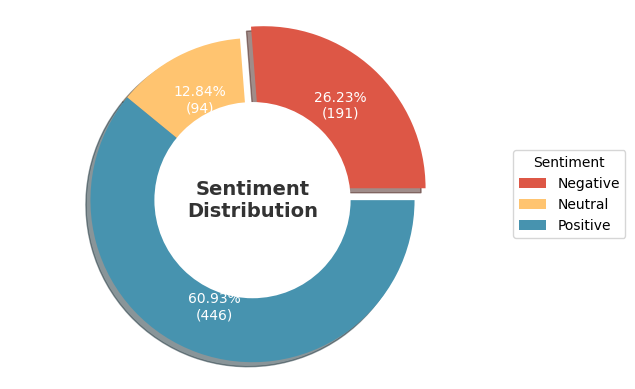

In [245]:
# Defining colors for the pie chart
colors = ['#DD5746', '#FFC470', '#4793AF']

explode = (0.1, 0, 0)

# Grouping the DataFrame by 'Sentiment Label' and count occurrences of each label
sentiment_counts = df1.groupby("Sentiment Label").size()

# Creating a new figure and axis for the pie chart
fig, ax = plt.subplots()

# Ploting the pie chart
wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="w"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True
)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

# Displaying the pie chart
plt.show()


######Histogram for Distribution of Sentiment Scores

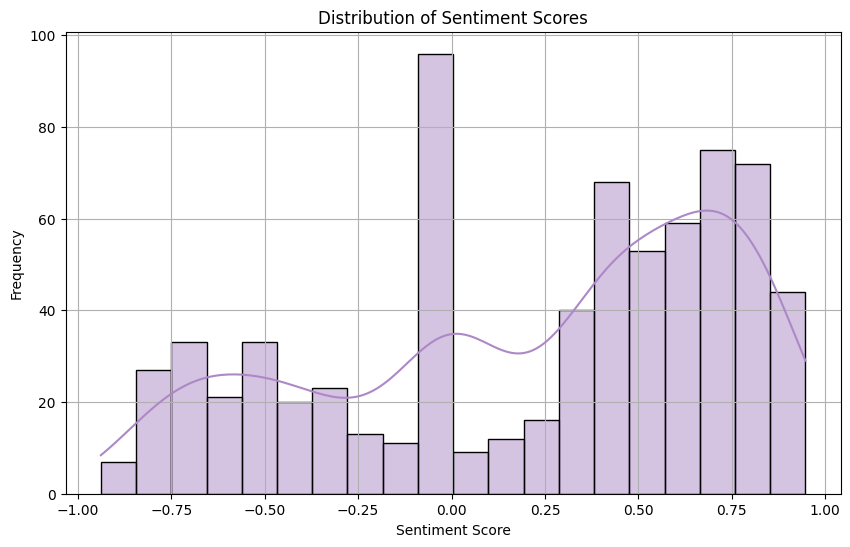

In [246]:
# Creating a histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df1['Sentiment'], bins=20, kde=True, color='#AD88C6')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

######Count Plot

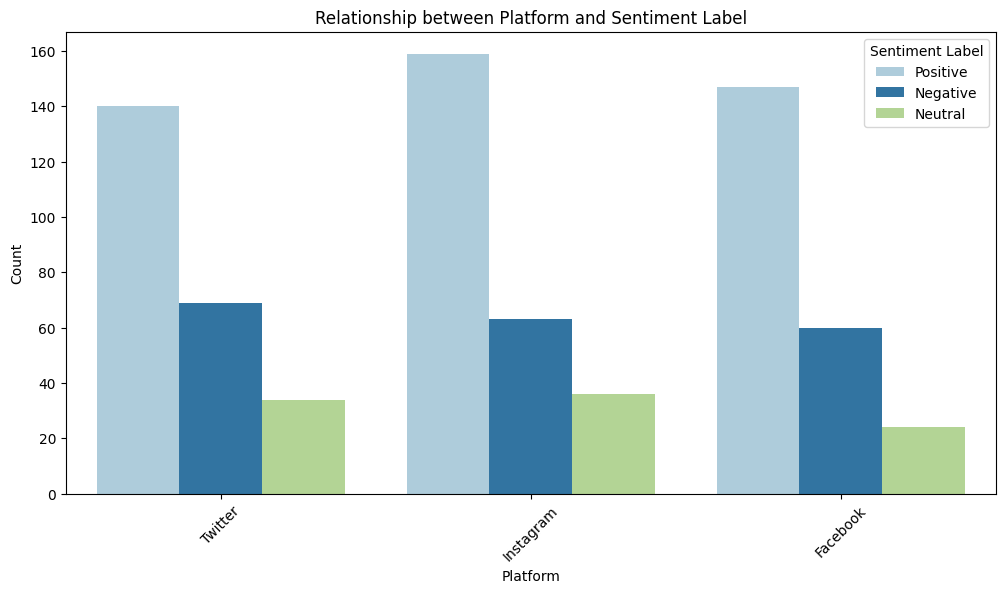

In [247]:
# Setting the figure size
plt.figure(figsize=(12, 6))

# Creating a countplot using seaborn
sns.countplot(x='Platform', hue='Sentiment Label', data=df1, palette='Paired')

# Adding a title and labels
plt.title('Relationship between Platform and Sentiment Label')
plt.xlabel('Platform')
plt.ylabel('Count')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

######Horizontal Stacked Bar Chart

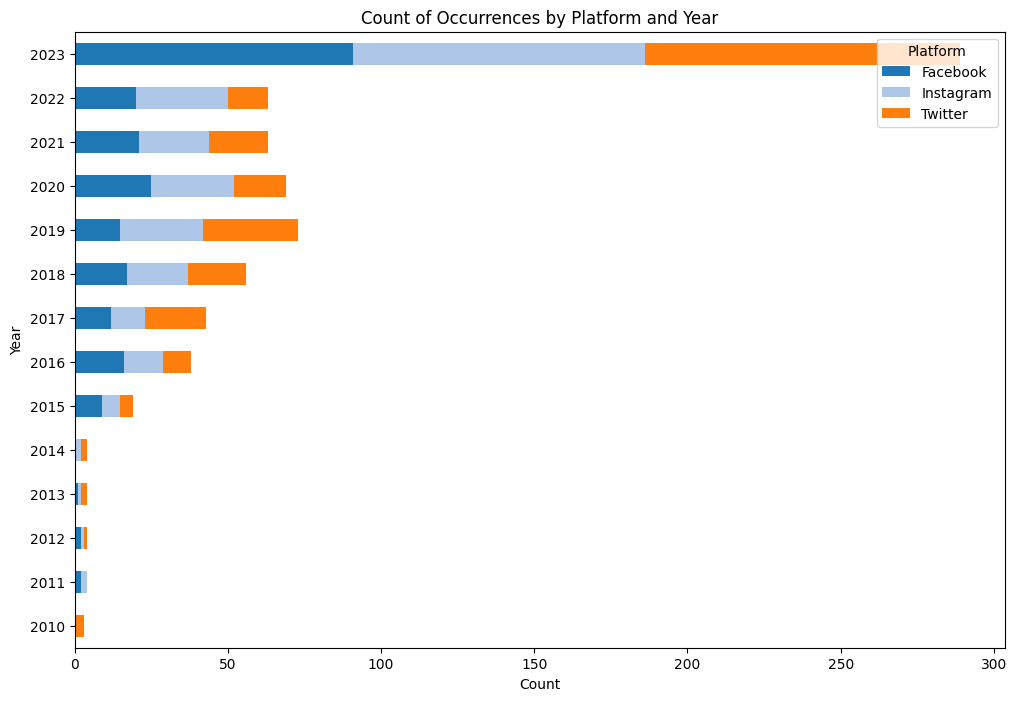

In [248]:
# Aggregating platforms with the same name
df1.loc[df1['Platform'] == 'Twitter', 'Platform'] = 'Twitter'

# Pivoting the DataFrame to have years as index, platforms as columns, and counts as values
pivot_df = df1.pivot_table(index='Year', columns='Platform', aggfunc='size', fill_value=0)

# Ploting a horizontal bar chart
plt.figure(figsize=(12, 8))
pivot_df.plot(kind='barh', stacked=True, color=plt.cm.tab20.colors, ax=plt.gca())
plt.xlabel('Count')
plt.ylabel('Year')
plt.title('Count of Occurrences by Platform and Year')
plt.legend(title='Platform', loc='upper right')
plt.show()


######Word Cloud

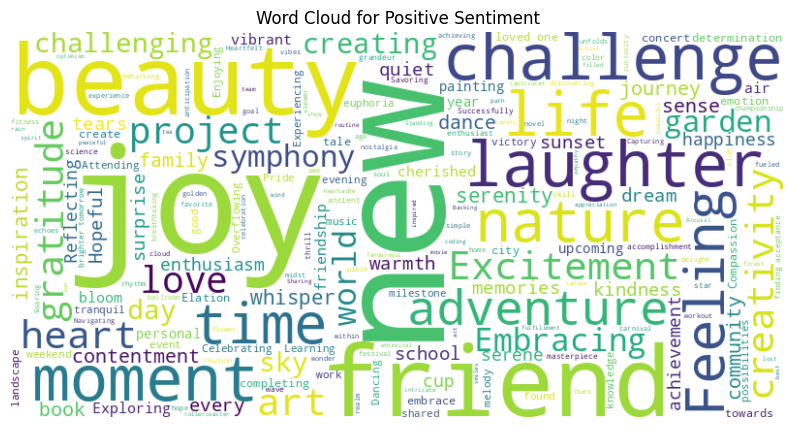

In [249]:
# Filtering the dataset to include only rows with positive sentiment labels
positive_data = df1[df1['Sentiment Label'] == 'Positive']

# Concatenating the text data from these rows
positive_text = ' '.join(positive_data['Text'])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Ploting the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()

######Common Words Table

In [250]:
# Filtering the dataset to include only rows with negative sentiment labels
negative_data = df1[df1['Sentiment Label'] == 'Negative']

# Counting the occurrences of each word in the 'text_lemmatized' column
top = Counter(negative_data['text_lemmatized'].str.split().explode())

# Creating a DataFrame with the most common words and their counts
temp_negative = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])

# Applying background gradient to the DataFrame
temp_negative_styled = temp_negative.style.background_gradient(cmap='Reds')

# Displaying the styled DataFrame
temp_negative_styled

,Common_words,count
0,shattered,14
1,despair,12
2,echo,12
3,lost,12
4,thought,11
5,emotion,11
6,loneliness,9
7,frustration,9
8,storm,9
9,labyrinth,9


######Confusion Matrix

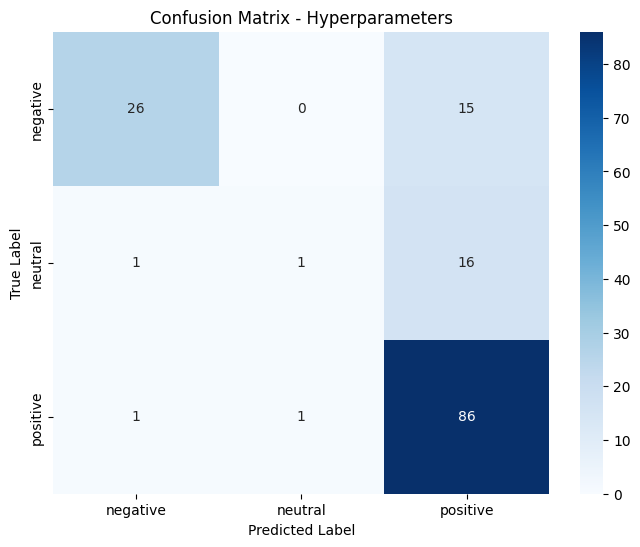

In [251]:
# Computing confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

######Heatmap

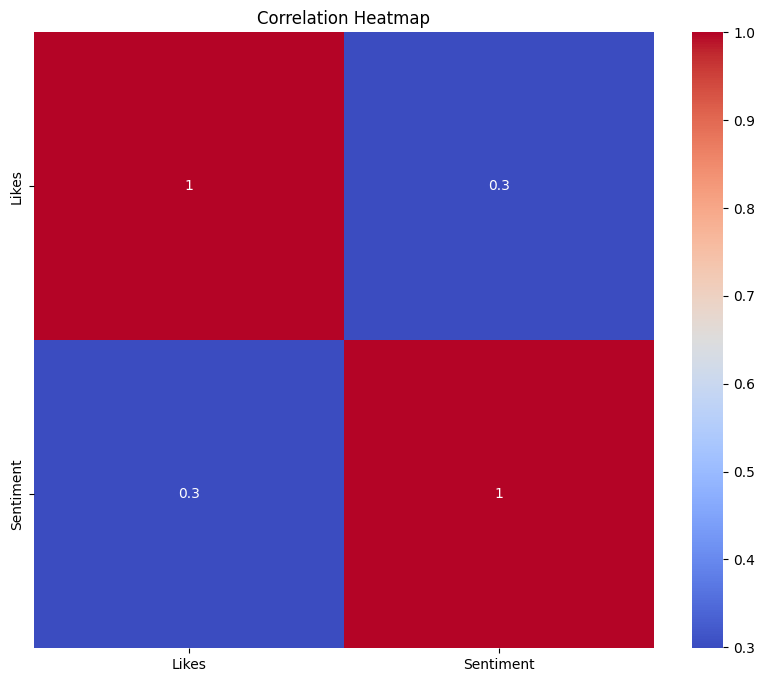

In [252]:
#  Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df1[['Likes', 'Sentiment']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

######Network Graph

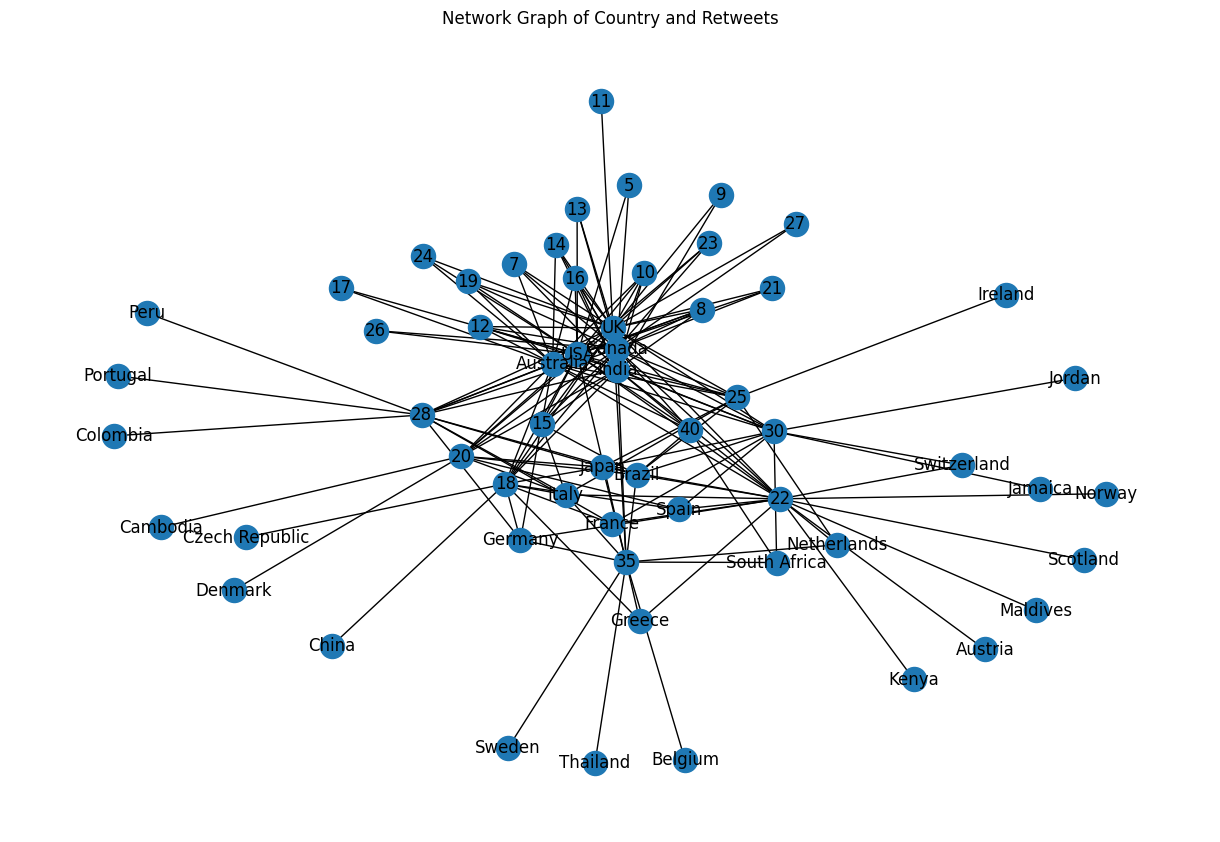

In [253]:
# Creating a network Graph
G = nx.from_pandas_edgelist(df1, source='Country', target='Retweets', edge_attr=True)
plt.figure(figsize=(12, 8))
nx.draw(G, with_labels=True)
plt.title('Network Graph of Country and Retweets')
plt.show()